In [1]:
using Agents
using Random
using CairoMakie
using InteractiveDynamics

In [2]:
VERSION

v"1.9.3"

In [3]:
import Pkg
Pkg.status("Agents")

Status `~/.julia/environments/v1.9/Project.toml`
  [46ada45e] Agents v5.17.1


In [4]:
@agent RandomWalkerType1 ContinuousAgent{2} begin
    change_direction_prob::Float64
end

In [5]:
function initializeWalker1Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic = true)
    
    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    model = ABM(RandomWalkerType1, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        change_direction_prob = max(0.4,rand())
        pos = (extent[1]/2,extent[2]/2)
        vel = Tuple(rand(2))
        agent = RandomWalkerType1(nextid(model), pos, vel, change_direction_prob)
        add_agent_pos!(agent, model)
    end
    return model
    
end

initializeWalker1Model (generic function with 1 method)

In [7]:
function walkerType1Step!(walker, model)
    
    time_step = 1
    
    function rotate_vector(v, θ)
        rotation_matrix = [cos(θ) -sin(θ); sin(θ) cos(θ)]
        return Tuple(rotation_matrix * collect(v))
    end
    
    if walker.change_direction_prob <= rand()
        rand_angle_rotate = rand() * 2pi
        walker.vel = rotate_vector(walker.vel, rand_angle_rotate)
        # move_agent!(agent::A, model::ABM{<:ContinuousSpace,A}, dt::Real)
        move_agent!(walker, model, time_step)
    end
    
end

walkerType1Step! (generic function with 1 method)

In [8]:
model_Walker1 = initializeWalker1Model()
model_Walker1

StandardABM with 1 agents of type RandomWalkerType1
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

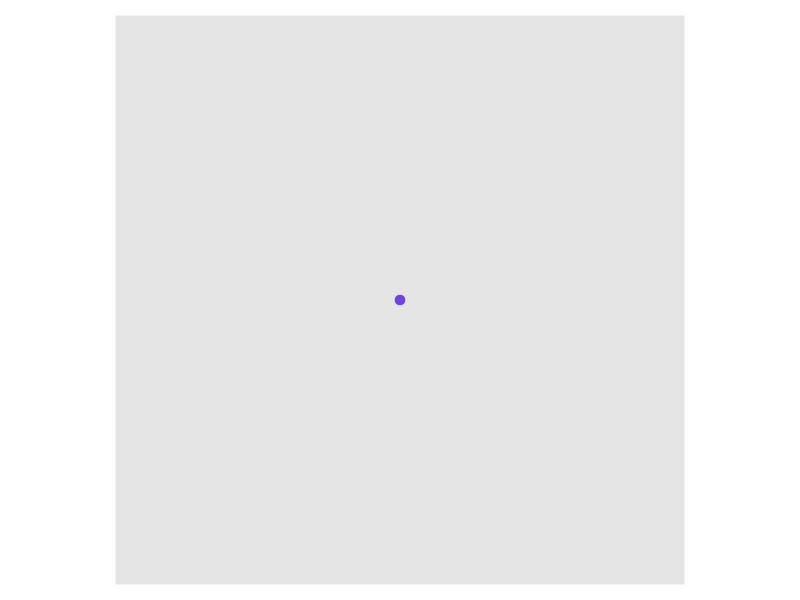

In [57]:
figure, = Agents.abmplot(model_Walker1; am=:circle)
figure

In [58]:
Agents.abmvideo(
    "plots/walker1.mp4", model_Walker1, walkerType1Step!;
    am = :circle,
    framerate = 2, frames = 50,
    title = "WalkerType1"
)

In [14]:
@agent RandomWalkerType2 ContinuousAgent{2} begin
end

In [15]:
function initializeWalker2Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic=true)

    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    model = ABM(RandomWalkerType2, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        pos = (extent[1]/2 + 1,extent[2]/2 + 1)
        vel = (max(0.4,rand()),max(0.4,rand()))
        agent = RandomWalkerType2(nextid(model), pos, vel)
        add_agent_pos!(agent, model)
    end
    return model
    
end

initializeWalker2Model (generic function with 1 method)

In [16]:
function walkerType2Step!(walker, model)
    
    randomwalk!(walker,model,1)
    
end

walkerType2Step! (generic function with 1 method)

In [17]:
model_Walker2 = initializeWalker2Model()
model_Walker2

StandardABM with 1 agents of type RandomWalkerType2
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

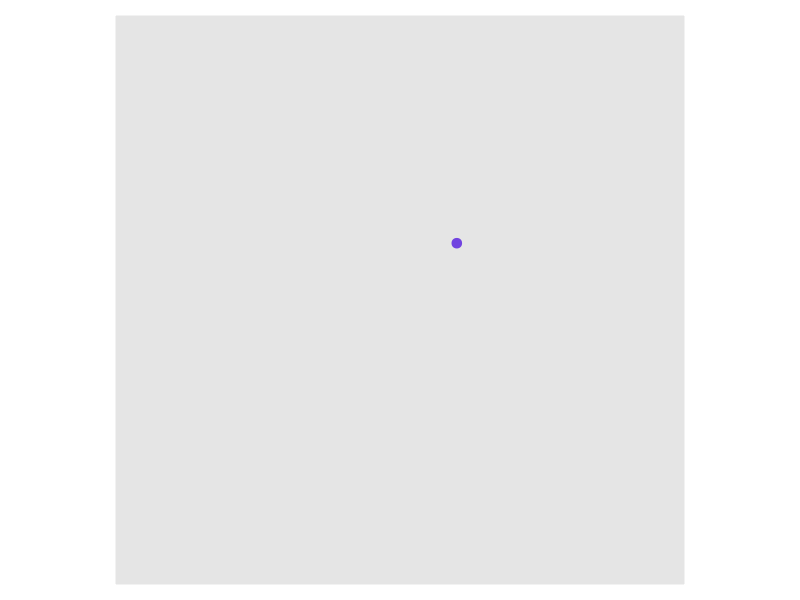

In [59]:
figure, = Agents.abmplot(model_Walker2; am=:circle)
figure

In [60]:
Agents.abmvideo(
    "plots/walker2.mp4", model_Walker2, walkerType2Step!;
    am = :circle,
    framerate = 2, frames = 50,
    title = "WalkerType2"
)

In [21]:
# multiple agent types

In [22]:
# use both types with multiple dispatch and the types
function walkerType1and2Step!(walker::RandomWalkerType1, model)
    
    time_step = 1
    
    function rotate_vector(v, θ)
        rotation_matrix = [cos(θ) -sin(θ); sin(θ) cos(θ)]
        return Tuple(rotation_matrix * collect(v))
    end
    
    if walker.change_direction_prob <= rand()
        rand_angle_rotate = rand() * 2pi
        walker.vel = rotate_vector(walker.vel, rand_angle_rotate)
        # move_agent!(agent::A, model::ABM{<:ContinuousSpace,A}, dt::Real)
        move_agent!(walker, model, time_step)
    end
    
end

function walkerType1and2Step!(walker::RandomWalkerType2, model)
    
    randomwalk!(walker,model,1)
    
end

walkerType1and2Step! (generic function with 2 methods)

In [23]:
function initializeWalker1and2Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic = true)
    
    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    agent_types = Union{RandomWalkerType1, RandomWalkerType2}

    model = ABM(agent_types, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        #add type 1
           
        change_direction_prob = max(0.4,rand())
        pos = (extent[1]/2,extent[2]/2)
        vel = Tuple(rand(2))
        agent = RandomWalkerType1(nextid(model), pos, vel, change_direction_prob)
        add_agent_pos!(agent, model)

        #add type 2
        pos = (extent[1]/2 + 1,extent[2]/2 + 1)
        vel = (max(0.4,rand()),max(0.4,rand()))
        agent = RandomWalkerType2(nextid(model), pos, vel)
        add_agent_pos!(agent, model)
        
    end
    return model
    
end

initializeWalker1and2Model (generic function with 1 method)

In [24]:
modelWalkers1and2 = initializeWalker1and2Model()

┌ Warning: Agent type is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
└ @ Agents /home/resort/.julia/packages/Agents/xtlGn/src/core/model_concrete.jl:139


StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

In [25]:
function MakerType1and2(agent) 
    if agent isa RandomWalkerType1
        return :circle
    elseif agent isa RandomWalkerType2
        return :utriangle
    end    
end

function ColorType1and2(agent) 
    if agent isa RandomWalkerType1
        return :blue
    elseif agent isa RandomWalkerType2
        return :orange
    end    
end

ColorType1and2 (generic function with 1 method)

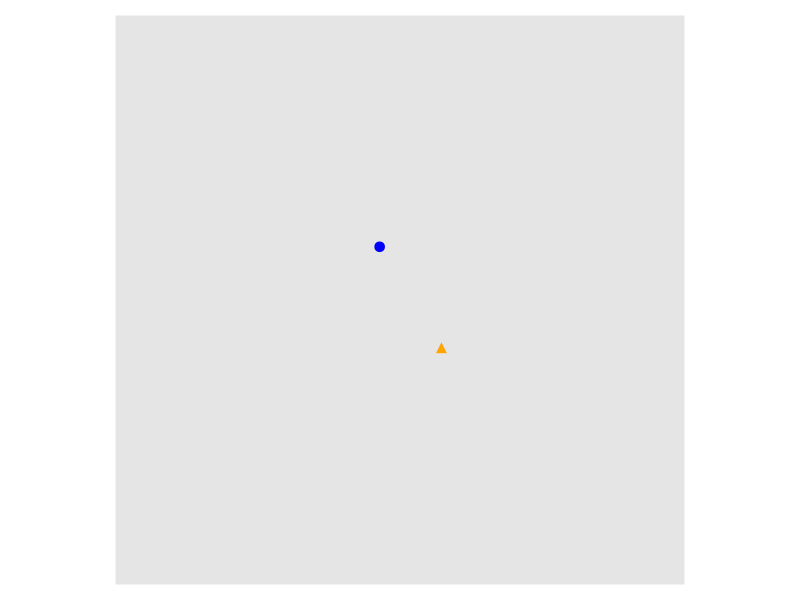

In [61]:
plotkwargs = (; ac=ColorType1and2, am=MakerType1and2)
figure, = Agents.abmplot(modelWalkers1and2; plotkwargs...)
figure

In [62]:
Agents.abmvideo(
    "plots/walker1and2.mp4", modelWalkers1and2, walkerType1and2Step!;
    framerate = 2, frames = 50,
    title = "WalkerType1and2", plotkwargs...
)

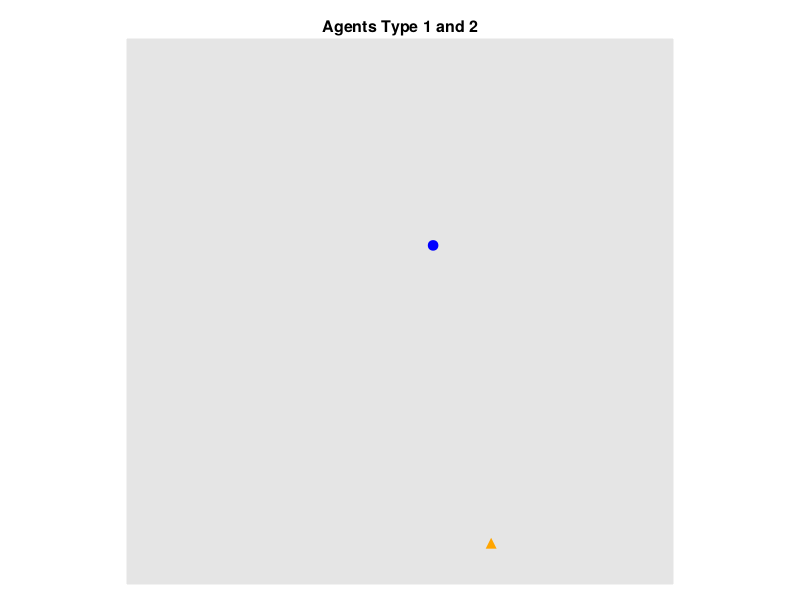

In [63]:
fontsize_theme =Theme(
    Axis = (
        backgroundcolor = :gray90,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xgridcolor = :gray90,
        ygridcolor = :gray90,
        xticksvisible = false,
        yticksvisible = false,
        xticklabelsvisible = false,
        yticklabelsvisible = false
                
    ))
set_theme!(fontsize_theme)

plotkwargs = (; ac=ColorType1and2, am=MakerType1and2 )
figure, = Agents.abmplot(modelWalkers1and2; plotkwargs...)

ax = Axis(figure[1,1], aspect = DataAspect(), title = "Agents Type 1 and 2")
hidedecorations!(ax)
save("plots/walker1b.png", figure)

figure

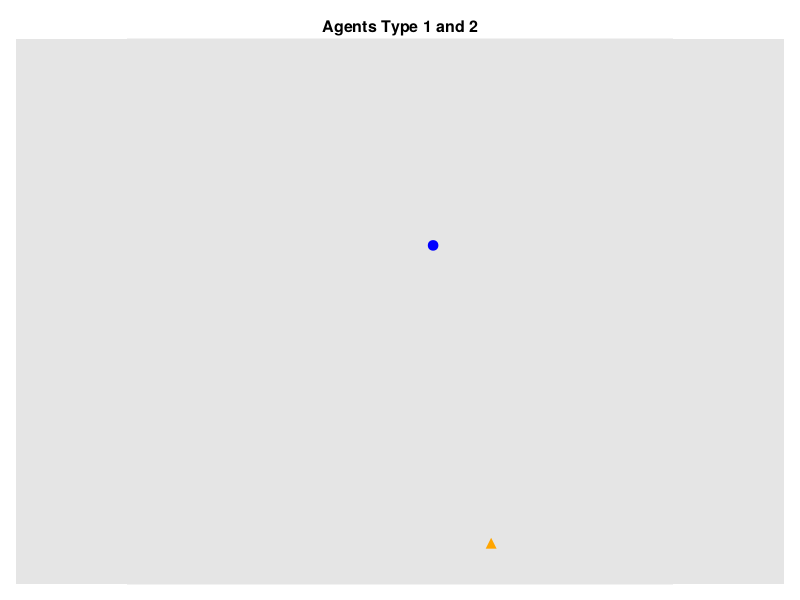

In [64]:
plotkwargs = (; ac=ColorType1and2, am=MakerType1and2 )
figure, = Agents.abmplot(modelWalkers1and2; plotkwargs...)

ax = Axis(figure[1,1], title = "Agents Type 1 and 2")
hidedecorations!(ax)
figure

In [31]:
modelWalkers1and2 = initializeWalker1and2Model()

┌ Warning: Agent type is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
└ @ Agents /home/resort/.julia/packages/Agents/xtlGn/src/core/model_concrete.jl:139


StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

In [32]:
pos(agent) = agent.pos
adata = [pos]

1-element Vector{typeof(pos)}:
 pos (generic function with 1 method)

In [33]:
agent_df, _ = run!(modelWalkers1and2, walkerType1and2Step!, 10; adata = adata)


(22×4 DataFrame
 Row │ step   id     agent_type         pos                
     │ Int64  Int64  Symbol             Tuple…             
─────┼─────────────────────────────────────────────────────
   1 │     0      1  RandomWalkerType1  (5.0, 5.0)
   2 │     0      2  RandomWalkerType2  (6.0, 6.0)
   3 │     1      1  RandomWalkerType1  (4.64183, 5.93701)
   4 │     1      2  RandomWalkerType2  (6.87329, 6.4872)
   5 │     2      1  RandomWalkerType1  (4.64183, 5.93701)
   6 │     2      2  RandomWalkerType2  (6.36084, 5.62848)
   7 │     3      1  RandomWalkerType1  (4.64183, 5.93701)
   8 │     3      2  RandomWalkerType2  (6.09508, 6.59252)
  ⋮  │   ⋮      ⋮            ⋮                  ⋮
  16 │     7      2  RandomWalkerType2  (5.22766, 4.82189)
  17 │     8      1  RandomWalkerType1  (4.64183, 5.93701)
  18 │     8      2  RandomWalkerType2  (4.7581, 3.93899)
  19 │     9      1  RandomWalkerType1  (4.64183, 5.93701)
  20 │     9      2  RandomWalkerType2  (5.40893, 3.17976)
  21 

In [34]:
pos_x = [pos[1] for pos in agent_df.pos ]
pos_y = [pos[2] for pos in agent_df.pos ];

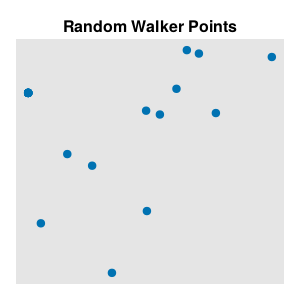

In [35]:
m_extent = getproperty(modelWalkers1and2, :space).extent
scale = 30
width = scale * m_extent[1]
height = scale * m_extent[2]

f = Figure(resolution = (width, height))
ax = f[1, 1] = Axis(f, title = "Random Walker Points")
scatter!(ax,pos_x, pos_y)

f

In [72]:
import Pkg; Pkg.add("GLMakie")

   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [e9467ef8] + GLMakie v0.8.8
    Updating `~/.julia/environments/v1.9/Manifest.toml`
 

 [f7f18e0c] + GLFW v3.4.1
  [e9467ef8] + GLMakie v0.8.8
  [7269a6da] + MeshIO v0.4.10
  [66fc600b] + ModernGL v1.1.7


Precompiling 

project...


  ✓ GLFW


  ✓ ModernGL


  ✓ MeshIO


  ✓ GLMakie
  4 dependencies successfully precompiled in 94 seconds. 468 already precompiled.


In [73]:
using GLMakie

In [74]:
plotkwargs = (; ac=ColorType1and2, am=MakerType1and2)
figure, = Agents.abmplot(modelWalkers1and2; agent_step! = walkerType1and2Step!, plotkwargs...)
figure

In [48]:
modelWalkers1and2

StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

In [49]:
t =getproperty(modelWalkers1and2, :space)

periodic continuous space with (10.0, 10.0) extent and spacing=1.0

In [50]:
t.extent

(10.0, 10.0)

In [51]:
t.spacing

1.0

In [52]:
collect( allagents(modelWalkers1and2) )

2-element Vector{Union{RandomWalkerType1, RandomWalkerType2}}:
 RandomWalkerType2(2, (5.7292353989171385, 4.127077440902132), (0.32030227444330656, 0.9473153925628175))
 RandomWalkerType1(1, (4.641828783393943, 5.937008417090389), (-0.3581712166060568, 0.9370084170903898), 0.958430411696502)

In [53]:
modelWalkers1and2

StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly